In [1]:
import os
import glob
import pandas as pd

folder_path = r"C:\Users\joao.herculano\GRUPO GINSENG\Assistência Suprimentos - 2025\CRITICOS INDUSTRIA\AcerteSeuPedido"

file_paths = glob.glob(os.path.join(folder_path, "*.xls")) + glob.glob(os.path.join(folder_path, "*.xlsx"))

dfs = []

for file_path in file_paths:
    try:
        excel_file = pd.ExcelFile(file_path)
        # Procura aba que comece com 'BOT_Itens_Críticos'
        for i in excel_file.sheet_names:
            if i.startswith('BOT_Itens Críticos'):
                target_sheet = i
        
        if target_sheet:
            df = pd.read_excel(excel_file, sheet_name=target_sheet, skiprows=5, usecols=lambda col: col != 'A')
            df["source_file"] = os.path.basename(file_path)
            dfs.append(df)
        else:
            print(f"[AVISO] Nenhuma aba correspondente encontrada em: {file_path}")
    
    except Exception as e:
        print(f"[ERRO] Falha ao ler {file_path}: {e}")

if dfs:
    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df
else:
    print("Nenhum dado foi carregado.")


c:\Users\joao.herculano\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\joao.herculano\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\joao.herculano\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\joao.herculano\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\joao.herculano\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\joao.h

In [2]:
combined_df.shape

(131702, 21)

In [3]:
#combined_df.to_excel(r"C:\Users\joao.herculano\GRUPO GINSENG\Assistência Suprimentos - 2025\CRITICOS INDUSTRIA\compiladoAcertePedido.xlsx",index=False)

In [4]:
df = pd.read_excel(r"C:\Users\joao.herculano\GRUPO GINSENG\Assistência Suprimentos - 2025\CRITICOS INDUSTRIA\compiladoAcertePedido.xlsx")

In [5]:
df.columns

Index(['Unnamed: 0', 'CENTRO DE DISTRIBUIÇÃO', 'MATERIAL', 'DESCRIÇÃO',
       'CATEGORIA', 'DATA PREVISTA\nREGULARIZAÇÃO',
       'Carteira Bloqueada Para Novos Pedidos?',
       'Incluir pedido?\n(Orientação industria)', 'source_file', 'SEMANA',
       'CURVA', 'MATERIAL SUBSTITUTO', 'DESCRIÇÃO SUBSTITUTO',
       'Previsão de Atendimento\n', 'Data de regularização ', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'GRID', 'Unnamed: 12',
       'Previsão de Atendimento', 'Coluna1', 'Coluna2'],
      dtype='object')

In [6]:
df.head()

Unnamed: 0 CENTRO DE DISTRIBUIÇÃO  MATERIAL  \
0         NaN               CD BAHIA   53460.0   
1         NaN               CD BAHIA   59176.0   
2         NaN               CD BAHIA   50931.0   
3         NaN               CD BAHIA   48620.0   
4         NaN               CD BAHIA   75478.0   

                                 DESCRIÇÃO       CATEGORIA  \
0          DR BOTICA COL POC/AMIZ V2 120ml      PERFUMARIA   
1  BOTIK GEL CONC LIMP FAC AC/GLIC V2 150g         LIMPEZA   
2               ESTJ NSPA 3 AMEIXAS REG/22  ESTOJO REGULAR   
3     DEM FLORATTA EDP FLEUR D ECLIPSE 4ml    DEMONSTRADOR   
4                    DEM LILY EDP LOVE 4ml    DEMONSTRADOR   

  DATA PREVISTA\nREGULARIZAÇÃO Carteira Bloqueada Para Novos Pedidos?  \
0                  ACIMA DE 60                                    Não   
1                  ACIMA DE 60                                    Não   
2                  ACIMA DE 60                                    Não   
3                  ACIMA DE 60                                    Não   
4                  ACIMA DE 60                                    Não   

  Incluir pedido?\n(Orientação industria)  \
0                                     Não   
1                                     Não   
2                                     Não   
3                                     Não   
4                                     Não   

                                         source_file SEMANA  ...  \
0  Acerte-seu-pedido-Boticario-S01-1735856932687....    S01  ...   
1  Acerte-seu-pedido-Boticario-S01-1735856932687....    S01  ...   
2  Acerte-seu-pedido-Boticario-S01-1735856932687....    S01  ...   
3  Acerte-seu-pedido-Boticario-S01-1735856932687....    S01  ...   
4  Acerte-seu-pedido-Boticario-S01-1735856932687....    S01  ...   

  Previsão de Atendimento\n Data de regularização  Unnamed: 8 Unnamed: 9  \
0                       NaN                    NaN        NaN        NaN   
1                       NaN                    NaN        NaN        NaN   
2                       NaN                    NaN        NaN        NaN   
3                       NaN                    NaN        NaN        NaN   
4                       NaN                    NaN        NaN        NaN   

  Unnamed: 10  GRID Unnamed: 12 Previsão de Atendimento  Coluna1 Coluna2  
0         NaN   NaN         NaN                     NaN      NaN     NaN  
1         NaN   NaN         NaN                     NaN      NaN     NaN  
2         NaN   NaN         NaN                     NaN      NaN     NaN  
3         NaN   NaN         NaN                     NaN      NaN     NaN  
4         NaN   NaN         NaN                     NaN      NaN     NaN  

[5 rows x 23 columns]

In [7]:
# Carrega o arquivo

df = df[['MATERIAL','SEMANA','CURVA']]
df['semana_num'] = df['SEMANA'].str.extract(r'S(\d+)').astype(int)

# Supondo df com colunas: MATERIAL e semana ('S01', 'S02', ...)
df['semana_num'] = df['SEMANA'].str.extract(r'S(\d+)').astype(int)

# Ordenar os dados
df = df.sort_values(['MATERIAL', 'semana_num'])

# Identificar rupturas de sequência para cada MATERIAL
df['grupo'] = df.groupby('MATERIAL')['semana_num'].diff().ne(1).cumsum()

# Para cada MATERIAL + grupo, contar duração do período crítico
grupos = df.groupby(['MATERIAL', 'CURVA', 'grupo']).size().reset_index(name='duracao')

# Agora calcular métricas por SKU
resultado = grupos.groupby('MATERIAL')['duracao'].agg(media_duracao='mean', max_duracao='max').reset_index()

In [8]:
resultado = grupos.groupby('MATERIAL')['duracao'].agg(media_duracao='mean', max_duracao='max',cont='count').reset_index()


In [9]:
resultado

MATERIAL  media_duracao  max_duracao  cont
0       1004.0       1.456522            8    46
1       1005.0       2.000000            2     1
2       1006.0       1.250000            2    16
3       1078.0       1.428571            3    14
4       1080.0       1.000000            1     5
...        ...            ...          ...   ...
3546   88585.0       1.545455            2    11
3547   88646.0       1.200000            2    10
3548   88893.0       1.000000            1     3
3549   88997.0       1.166667            2     6
3550   89256.0       1.000000            1     4

[3551 rows x 4 columns]

In [10]:
grupos

MATERIAL CURVA  grupo  duracao
0        1004.0     A      1        2
1        1004.0     A      2        8
2        1004.0     A      3        1
3        1004.0     A      4        1
4        1004.0     A      5        2
...         ...   ...    ...      ...
63352   88997.0     E  63353        1
63353   89256.0     C  63354        1
63354   89256.0     C  63355        1
63355   89256.0     C  63356        1
63356   89256.0     C  63357        1

[63357 rows x 4 columns]

In [11]:
resultado['max_duracao'].max()

np.int64(17)

In [12]:
media_geral = grupos['duracao'].mean()
print(f"Média geral de semanas em estado crítico: {media_geral:.2f} ou {round(media_geral*7)} dias.")


Média geral de semanas em estado crítico: 1.40 ou 10 dias.


In [13]:
grupos['duracao'].max()

np.int64(17)

In [14]:
#resultado.to_excel(r"C:\Users\joao.herculano\GRUPO GINSENG\Assistência Suprimentos - 2025\CRITICOS INDUSTRIA\EstudoItensCriticos.xlsx",index=False)

In [15]:
# Corrige o agrupamento incluindo CURVA
grupos = df.groupby(['MATERIAL', 'CURVA', 'grupo']).size().reset_index(name='duracao')

# Duração média dos períodos críticos por CURVA
media_duracao_por_curva = grupos.groupby('CURVA')['duracao'].mean().reset_index(name='media_duracao_critico')
media_duracao_por_curva['media_duracao_critico'] = round(media_duracao_por_curva['media_duracao_critico']*7).astype('Int64') #transforma de semanas em dias

# Quantas vezes cada SKU entrou em estado crítico
entradas_por_sku = grupos.groupby(['MATERIAL', 'CURVA']).size().reset_index(name='qtd_entradas')

# Média de entradas por SKU da mesma CURVA
media_entradas_por_curva = entradas_por_sku.groupby('CURVA')['qtd_entradas'].mean().reset_index(name='media_entradas_critico')

# Consolidar resultado
curva_analise = pd.merge(media_duracao_por_curva, media_entradas_por_curva, on='CURVA')

# Exibir resultado
curva_analise


CURVA  media_duracao_critico  media_entradas_critico
0     A                     10               35.852535
1     B                     10               29.591413
2     C                     10               17.367594
3     E                     10               11.119888

In [16]:
grupos

MATERIAL CURVA  grupo  duracao
0        1004.0     A      1        2
1        1004.0     A      2        8
2        1004.0     A      3        1
3        1004.0     A      4        1
4        1004.0     A      5        2
...         ...   ...    ...      ...
63352   88997.0     E  63353        1
63353   89256.0     C  63354        1
63354   89256.0     C  63355        1
63355   89256.0     C  63356        1
63356   89256.0     C  63357        1

[63357 rows x 4 columns]

In [17]:
entradas_por_sku2 = grupos.groupby(['MATERIAL']).size().reset_index(name='qtd_entradas')

entradas_por_sku2

MATERIAL  qtd_entradas
0       1004.0            46
1       1005.0             1
2       1006.0            16
3       1078.0            14
4       1080.0             5
...        ...           ...
3546   88585.0            11
3547   88646.0            10
3548   88893.0             3
3549   88997.0             6
3550   89256.0             4

[3551 rows x 2 columns]

Média geral de semanas em estado crítico: 1.40 ou 10 dias.

Arquivo Excel salvo com sucesso em:
C:/Users/joao.herculano/GRUPO GINSENG/Assistência Suprimentos - 2025/CRITICOS INDUSTRIA/analise_curva_resultado20250604.xlsx


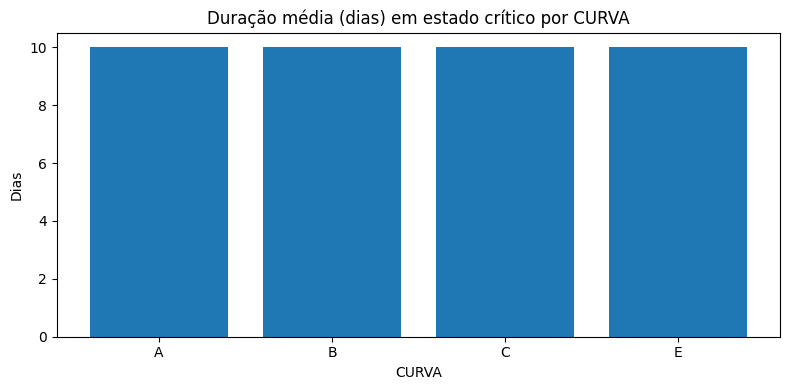

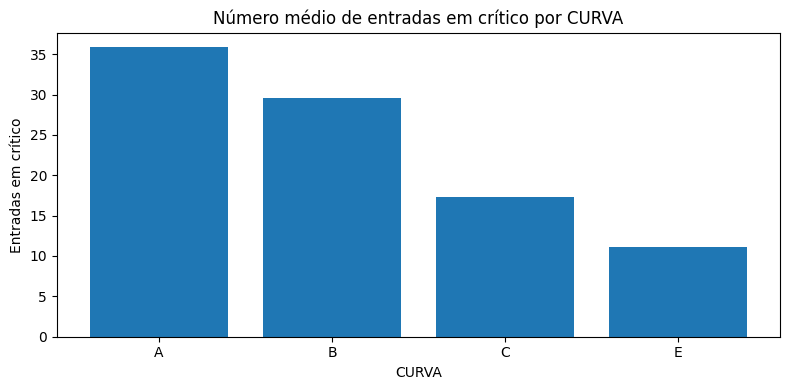

In [18]:
import matplotlib.pyplot as plt
from datetime import datetime

hoje = datetime.today().strftime('%Y%m%d')  # Exemplo: '20250604'

# === ETAPA 1: Carrega e prepara os dados ===
df = pd.read_excel(r"C:\Users\joao.herculano\GRUPO GINSENG\Assistência Suprimentos - 2025\CRITICOS INDUSTRIA\compiladoAcertePedido.xlsx")
df = df[['MATERIAL', 'SEMANA', 'CURVA']]
df['semana_num'] = df['SEMANA'].str.extract(r'S(\d+)').astype(int)
df = df.sort_values(['MATERIAL', 'semana_num'])
df['grupo'] = df.groupby('MATERIAL')['semana_num'].diff().ne(1).cumsum()

# === ETAPA 2: Agrupa dados ===
grupos = df.groupby(['MATERIAL', 'CURVA', 'grupo']).size().reset_index(name='duracao')
resultado = grupos.groupby('MATERIAL')['duracao'].agg(media_duracao='mean', max_duracao='max').reset_index()
media_geral = grupos['duracao'].mean()
print(f"Média geral de semanas em estado crítico: {media_geral:.2f} ou {round(media_geral * 7)} dias.")

# === ETAPA 3: Análise por CURVA ===
media_duracao_por_curva = grupos.groupby('CURVA')['duracao'].mean().reset_index(name='media_duracao_critico')
media_duracao_por_curva['media_duracao_critico'] = round(media_duracao_por_curva['media_duracao_critico']*7).astype('Int64')  # semanas → dias

entradas_por_sku = grupos.groupby(['MATERIAL', 'CURVA']).size().reset_index(name='qtd_entradas')
media_entradas_por_curva = entradas_por_sku.groupby('CURVA')['qtd_entradas'].mean().reset_index(name='media_entradas_critico')

curva_analise = pd.merge(media_duracao_por_curva, media_entradas_por_curva, on='CURVA')

# === ETAPA 4: Junta dados finais por SKU (CURVA + qtd_entradas)
resultado_final = pd.merge(resultado, entradas_por_sku, on='MATERIAL')
resultado_final = resultado_final[['MATERIAL', 'CURVA', 'media_duracao', 'max_duracao', 'qtd_entradas']]

# === ETAPA 5: Exporta para Excel ===
output_path = f"C:/Users/joao.herculano/GRUPO GINSENG/Assistência Suprimentos - 2025/CRITICOS INDUSTRIA/analise_curva_resultado{hoje}.xlsx"
with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
    resultado_final.to_excel(writer, sheet_name='Por SKU', index=False)
    curva_analise.to_excel(writer, sheet_name='Por CURVA', index=False)

print(f"\nArquivo Excel salvo com sucesso em:\n{output_path}")

# === ETAPA 6: Gráficos ===
# 1. Duração média por CURVA
plt.figure(figsize=(8, 4))
plt.bar(curva_analise['CURVA'], curva_analise['media_duracao_critico'])
plt.title('Duração média (dias) em estado crítico por CURVA')
plt.xlabel('CURVA')
plt.ylabel('Dias')
plt.tight_layout()
plt.show()

# 2. Entradas médias por CURVA
plt.figure(figsize=(8, 4))
plt.bar(curva_analise['CURVA'], curva_analise['media_entradas_critico'])
plt.title('Número médio de entradas em crítico por CURVA')
plt.xlabel('CURVA')
plt.ylabel('Entradas em crítico')
plt.tight_layout()
plt.show()
